## Exercice 1

### Importation des packages

In [ ]:
## Effectuez l'exercice en utilisant les fonctions importées suivantes selon vos besoins.
from numpy import cov as cov
from matplotlib.pyplot import colorbar as colorbar
from matplotlib.pyplot import xlabel as xlabel
from matplotlib.pyplot import ylabel as ylabel
from matplotlib.pyplot import legend as legend
from matplotlib.pyplot import grid as grid


from numpy.random import seed as seed
from numpy.random import rand as rand
from numpy.random import randn as randn
from numpy import pi as pi
from numpy import cos as cos
from numpy import sin as sin
from numpy import zeros as zeros
from numpy import ones as ones
from numpy import mean as mean
from numpy import mat as mat
from numpy import array as array
from numpy import transpose as transpose
from numpy import sqrt as sqrt
from numpy import diag as diag
from numpy import dot as dot
from numpy.linalg import inv as inv
from numpy.linalg import svd as svd
from numpy.matlib import repmat as repmat
from matplotlib.pyplot import figure as figure
from matplotlib.pyplot import title as title
from matplotlib.pyplot import plot as plot
from matplotlib.pyplot import scatter as scatter
from matplotlib.pyplot import axis as axis
from matplotlib.pyplot import quiver as quiver
from matplotlib.pyplot import savefig as savefig
from matplotlib.pyplot import show as show

### Votre implémentation

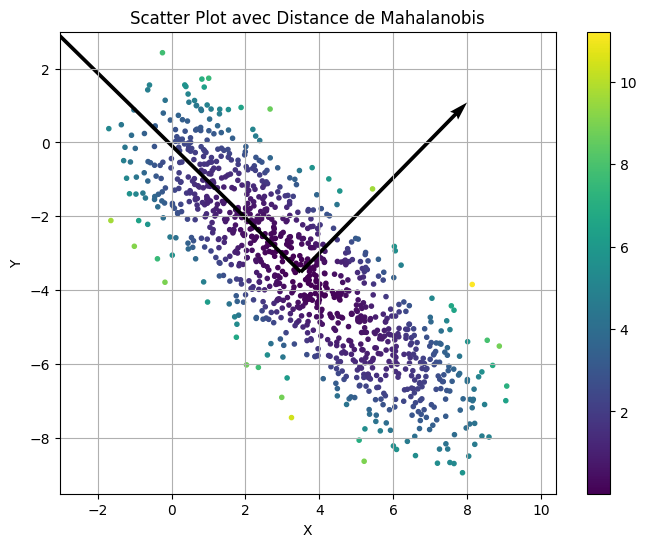

In [ ]:
# Partie A: Génération des données
seed(0)
n_points = 1000
x = rand(n_points) * 10
y = zeros(n_points)

theta = pi / 4  # angle de rotation
rotation_matrix = array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
xy = dot(array([x, y]).T, rotation_matrix)
noise = randn(n_points, 2)
data = xy + noise

# Partie B: Mahalanobis et PCA
mu = mean(data, axis=0)
sigma = cov(data, rowvar=False)
inv_sigma = inv(sigma)
mahalanobis_distances = array([dot(dot((x - mu).T, inv_sigma), (x - mu)) for x in data])

# Calcul des composantes principales
eigenvectors, eigenvalues, Vt = svd(sigma)
phi1 = eigenvectors[:, 0]
phi2 = eigenvectors[:, 1]
lambda1 = eigenvalues[0]  # première valeur propre
lambda2 = eigenvalues[1]  # deuxième valeur propre

# Partie C: Visualisation
figure(figsize=(8, 6))

# Scatter plot des données avec couleur basée sur la distance de Mahalanobis
sc = scatter(data[:, 0], data[:, 1], c=mahalanobis_distances,s=9)
colorbar(sc)
xlabel('X')
ylabel('Y')
title('Scatter Plot avec Distance de Mahalanobis')

# Ajout des vecteurs propres avec la longueur déterminée par les valeurs propres
scale_factor = 2  # pour ajuster la longueur des vecteurs
quiver(mu[0], mu[1], sqrt(lambda1) * phi1[0], sqrt(lambda1) * phi1[1], color='k', linewidth=4, scale=scale_factor)
quiver(mu[0], mu[1], sqrt(lambda2) * phi2[0], sqrt(lambda2) * phi2[1], color='k', linewidth=4, scale=scale_factor)

axis('equal')
grid(True)
show()


## Exercice 2

###Importation des packages

In [ ]:
## Effectuez l'exercice en utilisant les "packages" importés suivants selon vos besoins.
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Pour importer les données
from google.colab import files
from scipy.io import loadmat


from mpl_toolkits.mplot3d import Axes3D

###Votre implémentation

In [ ]:
uploaded_files = files.upload()



Saving face_data.mat to face_data.mat
Saving swiss_roll.mat to swiss_roll.mat
Saving swiss_roll_hole.mat to swiss_roll_hole.mat
Saving toroidal_helix.mat to toroidal_helix.mat


In [ ]:
def isomap(X, epsilon, d):
    D = cdist(X, X)
    N = (D < epsilon(D)) - np.eye(X.shape[0])

    from scipy.sparse.csgraph import shortest_path
    #Matrice de shortest path
    L = shortest_path(N)

    n = X.shape[0]
    J = np.eye(n) - np.ones((n, n)) / n
    Gram = -0.5 * J.dot(L ** 2).dot(J)

    #Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eigh(Gram)

    indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices[:d]]
    eigenvectors = eigenvectors[:, indices[:d]]

    Y = eigenvectors.dot(diag(sqrt(eigenvalues)))
    return Y

def mds(X, d):
    D = cdist(X, X)

    n = X.shape[0]
    J = np.eye(n) - np.ones((n, n)) / n
    Gram = -0.5 * J.dot(D ** 2).dot(J)

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(Gram)

    # Sort eigenvalues
    indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices[:d]]
    eigenvectors = eigenvectors[:, indices[:d]]

    Y = eigenvectors.dot(np.diag(np.sqrt(eigenvalues)))
    return Y

In [ ]:
#Load les données
swiss_roll_data = loadmat('swiss_roll.mat')
X_swiss_roll = swiss_roll_data['X']
c_swiss_roll = swiss_roll_data['c'].ravel()

toroidal_helix_data = loadmat('toroidal_helix.mat')
X_toroidal_helix = toroidal_helix_data['X']
c_toroidal_helix = toroidal_helix_data['c'].ravel()

face_data = loadmat('face_data.mat')
X_face = face_data['images']


#Fonction epsilon
epsilon = lambda D: np.percentile(D[D[:]>0], 3.5)


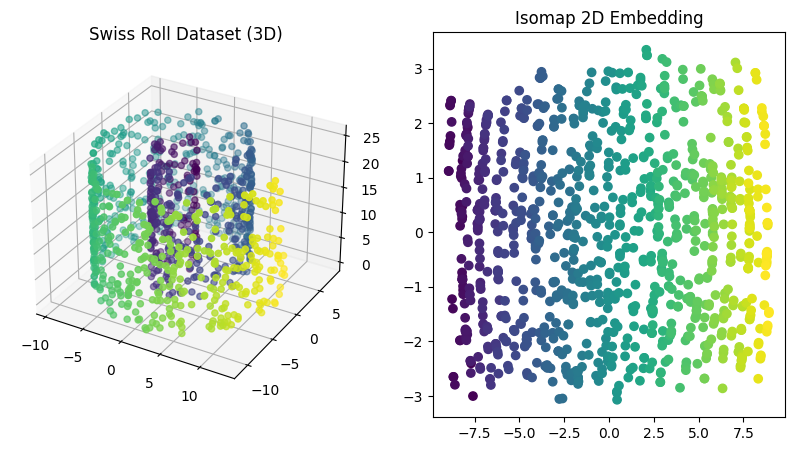

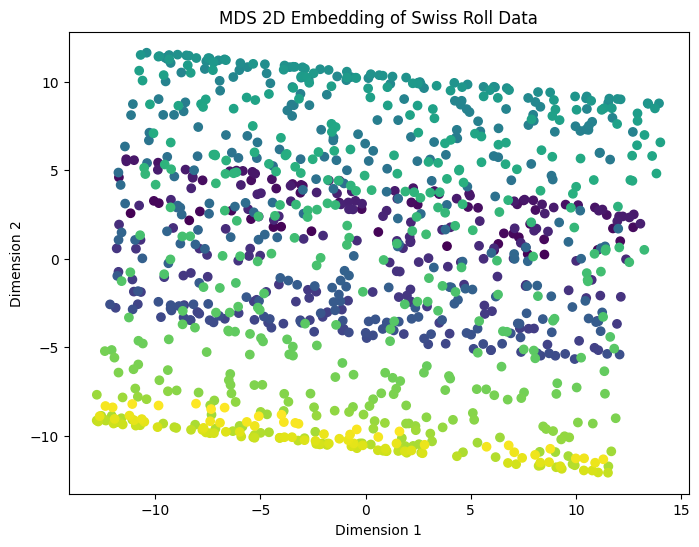

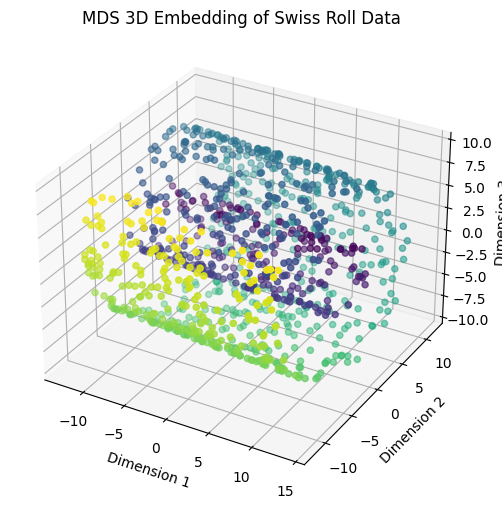

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_swiss_roll[:,0], X_swiss_roll[:,1], X_swiss_roll[:,2], c=c_swiss_roll)
ax1.set_title('Swiss Roll Dataset (3D)')

# Isomap
Y_isomap_swiss_roll = isomap(X_swiss_roll, epsilon, 2)
ax2 = fig.add_subplot(122)
ax2.scatter(Y_isomap_swiss_roll[:,0], Y_isomap_swiss_roll[:,1], c=c_swiss_roll)
ax2.set_title('Isomap 2D Embedding')

plt.show()


#MDS
Y_mds_2d_swiss_roll = mds(X_swiss_roll, 2)
Y_mds_3d_swiss_roll = mds(X_swiss_roll, 3)

#MDS 2D
plt.figure(figsize=(8, 6))
plt.scatter(Y_mds_2d_swiss_roll[:, 0], Y_mds_2d_swiss_roll[:, 1], c=c_swiss_roll)
plt.title('MDS 2D Embedding of Swiss Roll Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

#MDS 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y_mds_3d_swiss_roll[:, 0], Y_mds_3d_swiss_roll[:, 1], Y_mds_3d_swiss_roll[:, 2], c=c_swiss_roll)
ax.set_title('MDS 3D Embedding of Swiss Roll Data')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()


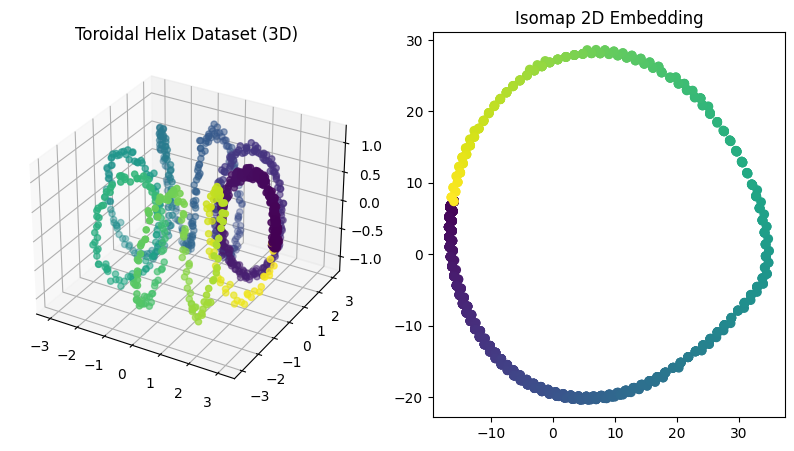

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_toroidal_helix[:,0], X_toroidal_helix[:,1], X_toroidal_helix[:,2], c=c_toroidal_helix)
ax1.set_title('Toroidal Helix Dataset (3D)')

#Isomap
Y_isomap_toroidal_helix = isomap(X_toroidal_helix, epsilon, 2)
ax2 = fig.add_subplot(122)
ax2.scatter(Y_isomap_toroidal_helix[:,0], Y_isomap_toroidal_helix[:,1], c=c_toroidal_helix)
ax2.set_title('Isomap 2D Embedding')

plt.show()

ValueError: cannot reshape array of size 698 into shape (64,64)

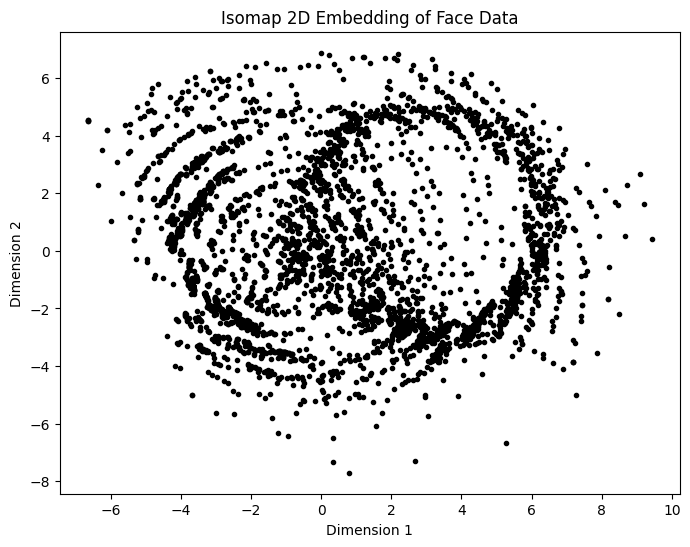

In [ ]:
embedding = isomap(X_face, epsilon, 2)

#Isomap embedding
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], color='black', s=9)
plt.title('Isomap 2D Embedding of Face Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

#grid 6x6
grid_size = 6
x_min, x_max = np.min(embedding[:, 0]), np.max(embedding[:, 0])
y_min, y_max = np.min(embedding[:, 1]), np.max(embedding[:, 1])
x_range = np.linspace(x_min, x_max, grid_size)
y_range = np.linspace(y_min, y_max, grid_size)
xx, yy = np.meshgrid(x_range, y_range)
grid_points = np.c_[xx.ravel(), yy.ravel()]

#indices of the nearest points
nearest_indices = []
for point in grid_points:
    min_distance = float('inf')
    nearest_index = None
    for i, embedding_point in enumerate(embedding):
        distance = np.linalg.norm(point - embedding_point)
        if distance < min_distance:
            min_distance = distance
            nearest_index = i
    nearest_indices.append(nearest_index)
nearest_indices = np.array(nearest_indices)

# Show the face images corresponding to the nearest indices
for index in nearest_indices:
    plt.imshow(X_face[index].reshape(64,64), alpha=0.5, extent=(embedding[index, 0], embedding[index, 0], embedding[index, 1], embedding[index, 1]))

# Show the plot
plt.show()


#j'a gardé mon code pour afficher les faces sur la grille 6x6 mais je nai pas réussi


## Exercice 3

In [ ]:
# Pour cet exercice, la rédaction d'un script est fortement recommandé, mais pas obligatoire.

###Importation des packages

In [ ]:
from pandas import read_csv
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import MDS

# Vous pouvez importer des autres packages pour cet exercice...par exemple pour le dendrogramme

In [ ]:
uploaded_files = files.upload()


Saving problem3_distances.csv to problem3_distances.csv


###Votre implémentation

<ipython-input-16-3c5832f702f9>:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distances, method='single')


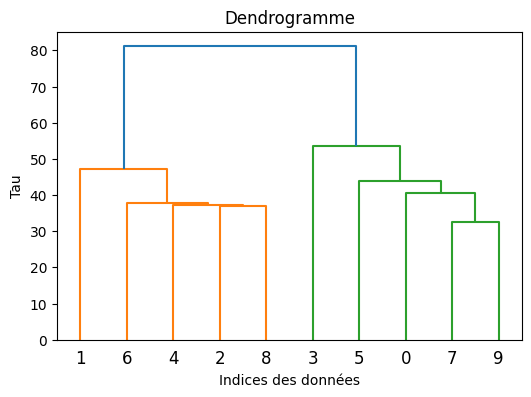

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


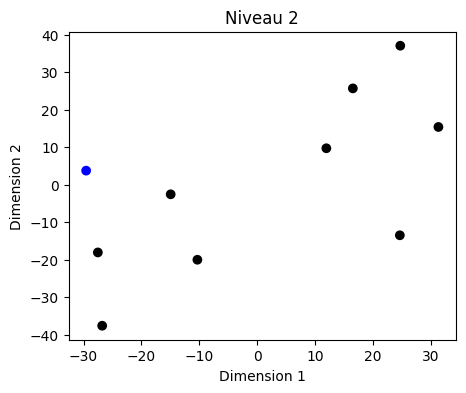

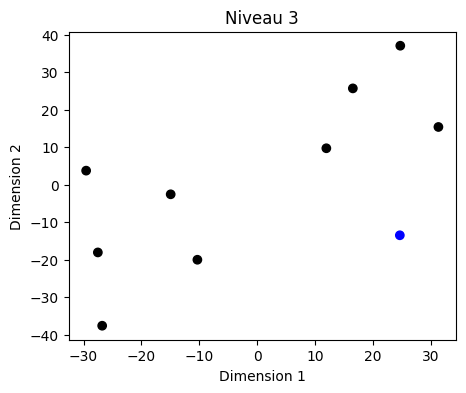

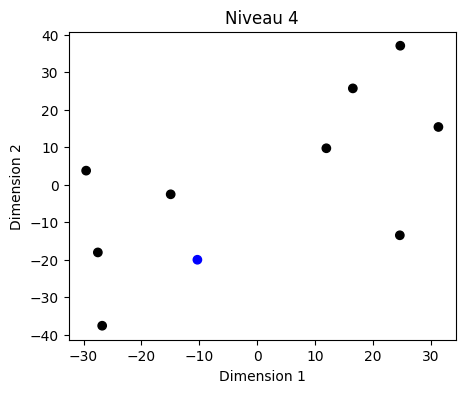

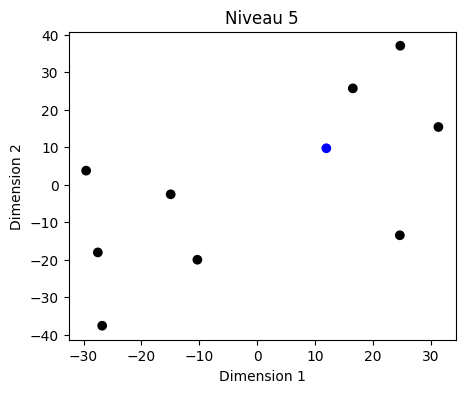

In [ ]:
distances =pd.read_csv("problem3_distances.csv", header=None).values.astype(float)

tau = 0

# Créer un regroupement de N groupes au niveau inférieur du dendrogramme
num_points = distances.shape[0]
clusters = np.arange(num_points)

dendrogram_levels = []

while len(set(clusters)) > 1:
    tau += 0.1
    merge_pairs = [(i, j) for i in range(num_points) for j in range(i + 1, num_points) if distances[i, j] <= tau]
    for pair in merge_pairs:
        cluster1 = clusters[pair[0]]
        cluster2 = clusters[pair[1]]
        clusters[clusters == cluster2] = cluster1

    dendrogram_levels.append(clusters.copy())

Z = linkage(distances, method='single')

# Générer le dendrogramme
plt.figure(figsize=(6,4))
plt.title('Dendrogramme')
dendrogram(Z) #je nai pas vrm réussi à utiliser avec tau
plt.xlabel('Indices des données')
plt.ylabel('Tau')
plt.show()

#MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
embedding = mds.fit_transform(distances)

levels = [2, 3, 4, 5]  #ignorer racine

for level in levels:
    plt.figure(figsize=(5, 4))
    plt.title(f"Niveau {level}")

    # Coloration des points en fonction du niveau de regroupement actuel
    colors = ['blue' if cluster == level else 'black' for cluster in dendrogram_levels[level]]
    plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

